# DemoClinical (Quick & Dirty)

NOTE: When modeling, make sure to remove all targets from input set:

```
'LaborType_SpontaneousOrAugmented_DB', 'Cesarean2', 'DLVRY_DT', 
'DLVRYGA_DYS_SBadj', 'DLVRYBefore28wks', 'DLVRYBefore34Wks', 
'DLVRYGA_DYS'
```

This exploration file was tinkered with all through development, e.g., we initially
looked at some models on the first version of the demoClinical set.  However, I've
updated on **Dec 10** to better reflect a logical flow from the previous JNBs.



In [197]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [198]:
df = pd.read_csv('../data/interim/democlinical_20191210_KU.csv')

In [199]:
df.shape 

(6875, 123)

In [200]:
df.head()

,patid,ssri2,antidepress2,cantipsych2,aantipsych2,moodstab2,stim2,antianx2,anticonv2,afpmom,...,nulliparous2,labortype_spontaneousoraugmented_db,avgnumcighome,s_anxiety,t_anxiety,height,bmiri,prepregweight,prepregbmi,armcirmm
0,S002-BISH-00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,...,0.0,1.0,1.0,23.0,32.0,64.00,21.57,121.25,20.81,245.67
1,S002-BISH-00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.17,...,0.0,1.0,1.0,58.0,63.0,64.61,21.57,110.23,18.57,255.33
2,S002-BISH-00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,...,1.0,1.0,2.5,30.0,52.0,62.61,20.87,-999999.00,-999999.00,228.00
3,S002-BISH-00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,...,0.0,1.0,2.0,31.0,37.0,61.94,37.30,191.80,35.14,379.00
4,S002-BISH-00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,...,0.0,1.0,2.0,26.0,43.0,65.38,22.12,-999999.00,-999999.00,263.50


In [201]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
# Classification Model Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import average_precision_score, f1_score, roc_auc_score, roc_curve
# Regression Model Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Target Breakdown

In [202]:
targets = ['LaborType_SpontaneousOrAugmented_DB', 'Cesarean2', 'DLVRY_DT', 
'DLVRYGA_DYS_SBadj', 'DLVRYBefore28wks', 'DLVRYBefore34Wks', 
'DLVRYGA_DYS']
targets = [item.lower() for item in targets]
targets

['labortype_spontaneousoraugmented_db',
 'cesarean2',
 'dlvry_dt',
 'dlvryga_dys_sbadj',
 'dlvrybefore28wks',
 'dlvrybefore34wks',
 'dlvryga_dys']

In [203]:
df.groupby('labortype_spontaneousoraugmented_db')['labortype_spontaneousoraugmented_db'].count()

labortype_spontaneousoraugmented_db
-999999.0       1
 0.0         1344
 1.0         5530
Name: labortype_spontaneousoraugmented_db, dtype: int64

In [204]:
df.groupby('cesarean2')['cesarean2'].count()

cesarean2
-999999.0      93
 0.0         5849
 1.0          933
Name: cesarean2, dtype: int64

In [205]:
df.groupby('dlvrybefore28wks')['dlvrybefore28wks'].count()

dlvrybefore28wks
-999999.0      15
 0.0         6734
 1.0          126
Name: dlvrybefore28wks, dtype: int64

In [206]:
df.groupby('dlvrybefore34wks')['dlvrybefore34wks'].count()

dlvrybefore34wks
-999999.0      15
 0.0         6529
 1.0          331
Name: dlvrybefore34wks, dtype: int64

# X, Y

In [207]:
pid = df[['patid']]
x = df.drop(['patid'] + targets, axis=1)
y = df[targets]

In [208]:
[item for item in x.columns]

['ssri2',
 'antidepress2',
 'cantipsych2',
 'aantipsych2',
 'moodstab2',
 'stim2',
 'antianx2',
 'anticonv2',
 'afpmom',
 'oneyrprior6',
 'drankaroundlmp2',
 'bingecountt1',
 'bingecountt2',
 'binge7t12',
 'binge7t22',
 'maxconsddayst1',
 'maxconsddayst2',
 'totalstddrinkslmp',
 'totalstddrinkst1',
 'totalstddrinkst2',
 'cdrisc_raw',
 'mjlmp2',
 'mjt12',
 'mjt22',
 'meth1yrprior6',
 'methlmp2',
 'metht12',
 'metht22',
 'other1yrprior2',
 'otherlmp2',
 'othert12',
 'othert22',
 'edinburgh',
 'edinburgh_cycle_id',
 'mat_age',
 'racenih7',
 'raceai4',
 'growth_deviation_index',
 'hxft2',
 'hxnt2',
 'hxpt2',
 'hxlb2',
 'hxsb2',
 'hxmc2',
 'hxab2',
 'hxid2',
 'hxsuid2',
 'hxsids2',
 'hxsidssuid2',
 'hx_baby_cleft2',
 'hx_baby_down2',
 'hx_baby_fas2',
 'hx_baby_pfas2',
 'hx_baby_heart2',
 'hx_baby_hypoxiaencep2',
 'hx_baby_iugrsga2',
 'hx_baby_jaundice2',
 'hx_baby_retard2',
 'hx_baby_nicu2',
 'hx_baby_neuraltube2',
 'hx_baby_poorweight2',
 'hx_baby_shoulder2',
 'anemia3',
 'sicklecellanemia

In [209]:
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [210]:
targets

['labortype_spontaneousoraugmented_db',
 'cesarean2',
 'dlvry_dt',
 'dlvryga_dys_sbadj',
 'dlvrybefore28wks',
 'dlvrybefore34wks',
 'dlvryga_dys']

In [211]:
len(p)

46

In [314]:
def multiple_rf(
    x_trn_,
    y_trn_,
    x_val_,
    y_val_,
    seeds = None,
):
    if seeds is None:
        seeds = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 
        59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131] 
    
    # Initialize lists
    acc_trn = list()
    acc_val = list()
    bacc_trn = list()
    bacc_val = list()
    auroc_trn = list()
    auroc_val = list()
    auprc_trn = list()
    auprc_val = list()
    f1_trn = list()
    f1_val = list()
    gini = list()
    
    for seed in seeds:
        
        # Model Metrics
        rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=seed)
        rf.fit(x_trn_, y_trn_.values.ravel())
        yp_trn = rf.predict(x_trn_)
        yp_val = rf.predict(x_val_)
        
        acc_trn.append(accuracy_score(y_trn_, yp_trn))
        acc_val.append(accuracy_score(y_val_, yp_val))
        bacc_trn.append(balanced_accuracy_score(y_trn_, yp_trn))
        bacc_val.append(balanced_accuracy_score(y_val_, yp_val))
        auroc_trn.append(roc_auc_score(y_trn_, yp_trn))
        auroc_val.append(roc_auc_score(y_val_, yp_val))
        auprc_trn.append(average_precision_score(y_trn_, yp_trn))
        auprc_val.append(average_precision_score(y_val_, yp_val))
        f1_trn.append(f1_score(y_trn_, yp_trn))
        f1_val.append(f1_score(y_val_, yp_val))
        
        # Gini Importances
        gimp_ = zip(x_trn_.columns, rf.feature_importances_)
        gimp = pd.DataFrame(gimp_, columns=['x_col','gini_importance']).\
            sort_values(by='gini_importance',ascending=False).\
            set_index(pd.Index(range(1,len(x_trn_.columns)+1))).\
            reset_index()
        gini.append(gimp)
        
    # Model Metrics
    means = {
        'acc_trn': np.mean(acc_trn),
        'acc_val': np.mean(acc_val),
        'bacc_trn': np.mean(bacc_trn),
        'bacc_val': np.mean(bacc_val),
        'auroc_trn': np.mean(auroc_trn),
        'auroc_val': np.mean(auroc_val),
        'auprc_trn': np.mean(auprc_trn),
        'auprc_val': np.mean(auprc_val),
        'f1_trn': np.mean(f1_trn),
        'f1_val': np.mean(f1_val),
    }
    
    for key in means.keys():
        means[key] = np.round(means[key], 4)
    
    # Gini Importances
    gini_df = pd.concat(gini)

    
    return means, gini_df

In [182]:
# we will ultimately use cesarean2 to split the data set...
target = 'labortype_spontaneousoraugmented_db'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

labortype_spontaneousoraugmented_db 

Trn Acc: 1.0
Val Acc: 0.793
-------------------
Trn bAcc: 1.0
Val bAcc: 0.5521
-------------------
Trn AUROC:
 1.0
Val AUROC:
 0.5521
-------------------
Trn AUPRC:
 1.0
Val AUPRC:
 0.8019
-------------------
Trn F1:
 1.0
Val F1:
 0.8809
-------------------


,gini_importance
x_col,
bmiri,0.056933
armcirmm,0.051881
height,0.046973
precarefirstga,0.046709
mat_age,0.038488
t_anxiety,0.036661
growth_deviation_index,0.036366
s_anxiety,0.034787
edinburgh,0.034525


In [195]:
# we will ultimately use this var to split the data set...
target = 'cesarean2'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
#metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
"""
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')
"""
#roc_curve

"\nprint(target,'\n')\nprint('Trn Acc:', metrics['acc_trn'])\nprint('Val Acc:', metrics['acc_val'])\nprint('-------------------')\nprint('Trn bAcc:', metrics['bacc_trn'])\nprint('Val bAcc:', metrics['bacc_val'])\nprint('-------------------')\nprint('Trn AUROC:\n', metrics['auroc_trn'])\nprint('Val AUROC:\n', metrics['auroc_val'])\nprint('-------------------')\nprint('Trn AUPRC:\n', metrics['auprc_trn'])\nprint('Val AUPRC:\n', metrics['auprc_val'])\nprint('-------------------')\nprint('Trn F1:\n', metrics['f1_trn'])\nprint('Val F1:\n', metrics['f1_val'])\nprint('-------------------')\n"

In [184]:
target = 'dlvrybefore34wks'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore34wks 

Trn Acc: 1.0
Val Acc: 0.9533
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.6085
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.6085
-------------------
Trn AUPRC:
 0.9992
Val AUPRC:
 0.169
-------------------
Trn F1:
 0.9996
Val F1:
 0.3243
-------------------


,gini_importance
x_col,
precarefirstga,0.044956
bmiri,0.044092
height,0.044000
armcirmm,0.040637
mat_age,0.035972
t_anxiety,0.035432
gender2,0.035067
growth_deviation_index,0.033020
edinburgh,0.030825


In [213]:
target = 'dlvrybefore28wks'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

#imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9907
-------------------
Trn bAcc: 0.9993
Val bAcc: 0.7357
-------------------
Trn AUROC:
 0.9993
Val AUROC:
 0.7357
-------------------
Trn AUPRC:
 0.9987
Val AUPRC:
 0.4486
-------------------
Trn F1:
 0.9993
Val F1:
 0.6263
-------------------


In [214]:
imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

,gini_importance
x_col,
gender2,0.109754
precarefirstga,0.052355
bmiri,0.036748
height,0.035010
armcirmm,0.033958
precaret1_2,0.032426
othert22,0.031298
t_anxiety,0.030908
totalstddrinkst2,0.030499


In [54]:
# NEED TO STABILIZE THIS (HAVE ONLY BEEN WORKING ON CLASSIFICATION)


target = 'dlvryga_dys'
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn_, y_trn_.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn_)
yp_val = rf.predict(x_val_)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn_, yp_trn))
print('Val MSE:',mean_squared_error(y_val_, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn_, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val_, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn_, yp_trn))
print('Val r2:',r2_score(y_val_, yp_val))

# Gini Importances
imp = zip(x.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x.columns)+1)))[:10]

dlvryga_dys 

Trn MSE: 41.97774105394709
Val MSE: 242.4043966266438
-------------------
Trn MnAbsErr: 4.228910643615913
Val MnAbsErr: 10.651875357347054
-------------------
Trn r2: 0.9173690548319637
Val r2: 0.5326262878486191


,x_col,gini_importance
1,gender2,0.363155
2,bmiri,0.044151
3,height,0.037990
4,precarefirstga,0.036506
5,armcirmm,0.035230
6,toiletwater2,0.034842
7,mat_age,0.027948
8,t_anxiety,0.025305
9,s_anxiety,0.023990
10,growth_deviation_index,0.022799


# DemoClincal Done Right
We are removing all cesareans/inductions.

This is encoded in Dani's variable, `labortype_spontaneousoraugmented_db`:
* 0 - throw out
* 1 - keep

In [ ]:
df = pd.read_csv('../data/interim/democlinical_20191210_KU.csv')

In [186]:
df.query('labortype_spontaneousoraugmented_db == 1', inplace=True)

In [187]:
df.shape

(5530, 123)

In [188]:
pid = df[['patid']]
x = df.drop(['patid'] + targets, axis=1)
y = df[targets]

x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [189]:
target = 'dlvrybefore34wks'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore34wks 

Trn Acc: 1.0
Val Acc: 0.9649
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.5136
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.5136
-------------------
Trn AUPRC:
 0.9993
Val AUPRC:
 0.0467
-------------------
Trn F1:
 0.9996
Val F1:
 0.0534
-------------------


,gini_importance
x_col,
bmiri,0.053006
precarefirstga,0.049444
height,0.048842
armcirmm,0.045711
mat_age,0.039955
growth_deviation_index,0.032268
edinburgh,0.030184
gender2,0.030106
t_anxiety,0.028620


In [190]:
target = 'dlvrybefore28wks'

# Training Data
valid_trn_index = y_trn[target].replace(-999999, np.nan).dropna().index
x_trn_ = x_trn.loc[valid_trn_index,:]
y_trn_ = y_trn[target][valid_trn_index]

# Validation Data
valid_val_index = y_val[target].replace(-999999, np.nan).dropna().index
x_val_ = x_val.loc[valid_val_index,:]
y_val_ = y_val[target][valid_val_index]

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn_, y_trn_, x_val_, y_val_)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9908
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.5357
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.5357
-------------------
Trn AUPRC:
 0.9992
Val AUPRC:
 0.0806
-------------------
Trn F1:
 0.9996
Val F1:
 0.1333
-------------------


,gini_importance
x_col,
gender2,0.096463
precarefirstga,0.051196
bmiri,0.035430
height,0.034996
armcirmm,0.034165
mat_age,0.031075
precaret1_2,0.029163
totalstddrinkst1,0.028516
t_anxiety,0.027565




 

Validation metrics for `dlvrybefore34wks`:

| Metric | Before Filtering | After Filtering |
|--------|---------|-----------|
| Acc | 0.9533 | 0.9649 |
| bAcc | 0.6085 | 0.5136 | 
| AUROC | 0.6085 |  0.5136 |
| AUPRC | 0.169 | 0.0467 | 
| F1 | 0.3243 | 0.0534 |



Validation metrics for `dlvrybefore28wks`:

| Metric | Before Filtering | After Filtering |
|--------|---------|-----------|
| Acc |  0.9861 | 0.9908 | 
| bAcc |   0.6997 | 0.5357 | 
| AUROC |   0.6997 | 0.5357 | 
| AUPRC |   0.3512 |  0.0806 | 
| F1 |  0.5435 |  0.1333 |



# Sensors
Sensors make everything a bit more complex.  Basically, these things
were measured mostly during F3, which we can't use to predict pre-term before 32wks or 28wks.  For
a lot of the sensor data, only ~3% of the population has data in F1 or F2.

It's worse than this though: for example, missing sensor data might be a huge predictor
of early pregnancy.  This is "informative missingness," but is not usable: it is leakage of 
sorts.  In other words, when deploying the model in the field, missing sensor data might
just mean the patient has not recorded it yet: the prediction should not necessarily change
the minute after someone gets sensor data recorded.....

To help remedy this, we need to do a narrow, potentially biased study on only those who
have sensor data.  

We will do this for:
* TOI
* MON RMSSD
* MON MHR
* MON MVMT
* MON ALL
* SENSORS ALL

Then we will repeat all of these with the democlinical data:
* TOI + DemoClinical
* MON RMSSD + DemoClinical
* MON MHR + DemoClinical
* MON MVMT + DemoClinical
* MON ALL + DemoClinical
* SENSORS ALL + DemoClinical



# Scenario 1:  Include MON-RMSSD-F1 Data
From JNB `02b__KU`, we know that only MON RMSSD has decent F1 data, so let's build a model
with that first.

NOTE: a condition here is that a patient must have at least one MON-RMSSD-F1 data.

**Results**:  

What did we learn?

### Scenario 1
In scenario 1, we extended the demoClinical variable set to include a limited
amount of sensor data, namely the F12F variables from the MON RMSSD data set.  We
restrict the data set to only those patients that have at least one non-missing value 
among the MON RMSSD variables.  Here,
we find out that there is not enough signal to predict any events.

### Scenario 2
In scenario 2, we check our sanity by looking at the original model again.  In other words,
we use only demoClinical variables and ALL available demoClinical records from the full set.  Here,
we get back the decent results we were already aware of.

### Scenario 3
In scenario 3, we check our sanity again.  We restrict the data set again, like in scenario 1,
to only those records that have at least one non-missing value among the RMSSD F1 variables. The 
idea is that maybe the sensor data adds just enough noise to throw the model off, so let's 
look at what happens without it...  This really should not be the case since the model
is a random forest, which should basically just ignore the few additional noisy variables. 
Our intuition is correct:  the model does no better on the restricted data set when the
RMSSD F1 variables are excluded.

### Scenario 4
The last scenario is this: maybe the restricted data set is too restrictive; maybe if we 
add the RMSSD F1 vars, but do not restrict the records, then the records that do have sensor
data will bump the signal just enough to see improved model metrics... This is not the case.  If
anything, the model metrics are worse (though this is likely a statistical fluctuation due
to how this particular set was split).  

In [283]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
# Classification Model Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import average_precision_score, f1_score, roc_auc_score, roc_curve
# Regression Model Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MON RMSSD F1 Data (Dlvry B4 28 Wks)

In [ ]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [294]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
sensor_set1 = [item for item in sensor_cols if 'f12f' in item]
sensor_drop1 = [item for item in sensor_cols if item not in sensor_set1]

# Keep only those patients w/ at least one sensor data point
f1rmssd_valid_index = dff[sensor_set1].replace(-999999,np.nan).isnull().sum(axis=1) < len(sensor_set1)

In [351]:
target = 'dlvrybefore28wks'

# Define Scenario Data
pid = dff[f1rmssd_valid_index].index
x = dff[f1rmssd_valid_index].drop(targets + sensor_drop1, axis=1)
y = dff[f1rmssd_valid_index][[target]]
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]
# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, stratify=y_val, test_size=0.15)


# SANITY CHECK (full data set, cesarean/induction NOT removed)
# I'm looking at this stuff again b/c the F1 RMSSD data actually makes things
#    worse..........
# Define Scenario Data
pid = dff.index
xx = dff.drop(targets + sensor_cols, axis=1)
yy = dff[[target]]
# Only keep records with non-missing target value
valid_target_index = yy[target].replace(-999999, np.nan).dropna().index
xx = xx.loc[valid_target_index,:]
yy = yy.loc[valid_target_index,:]
# Split Data
xx_trn, xx_val, yy_trn, yy_val = train_test_split(xx, yy, stratify=yy, train_size=0.7)
xx_val, xx_tst, yy_val, yy_tst = train_test_split(xx_val, yy_val, stratify=yy_val, test_size=0.15)


# SANITY CHECK #2 (F1-RMSSD "valid" data set, cesarean/induction NOT removed)
# I'm looking at this stuff again b/c the F1 RMSSD data actually makes things
#    worse..........
pid = dff[f1rmssd_valid_index].index
xxx = dff[f1rmssd_valid_index].drop(targets + sensor_cols, axis=1)
yyy = dff[f1rmssd_valid_index][[target]]
# Only keep records with non-missing target value
valid_target_index = yyy[target].replace(-999999, np.nan).dropna().index
xxx = xxx.loc[valid_target_index,:]
yyy = yyy.loc[valid_target_index,:]
# Split Data
xxx_trn, xxx_val, yyy_trn, yyy_val = train_test_split(xxx, yyy, stratify=yyy, train_size=0.7)
xxx_val, xxx_tst, yyy_val, yyy_tst = train_test_split(xxx_val, yyy_val, stratify=yyy_val, test_size=0.15) 
# 0.15 was by accident (should be 0.5), but must move on! (this makes for a better/bigger val set, worse tst set)


# Final check: use sensor data w/ all valid demoClinical records (i.e., do not drop patients w/o sensor data)
pid = dff.index
x4 = dff.drop(targets + sensor_cols, axis=1)
y4 = dff[[target]]
# Only keep records with non-missing target value
valid_target_index = y4[target].replace(-999999, np.nan).dropna().index
x4 = x4.loc[valid_target_index,:]
y4 = y4.loc[valid_target_index,:]
# Split Data
x4_trn, x4_val, y4_trn, y4_val = train_test_split(x4, y4, stratify=y4, train_size=0.7)
x4_val, x4_tst, y4_val, y4_tst = train_test_split(x4_val, y4_val, stratify=y4_val, test_size=0.15) 

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [346]:
print('x:', x_trn.shape)
print('xx:', xx_trn.shape)
print('xxx:', xxx_trn.shape)

x: (2459, 126)
xx: (4801, 115)
xxx: (2459, 115)


In [347]:
yyy_val.sum()

dlvrybefore28wks    11.0
dtype: float64

In [339]:
# All DemoClinical Vars + MON-RMSSD-F1 Vars 
#   Records:  Cesarean/induction NOT removed
#   Records:  Reduced: only records w/ at least 1 non-null MON-RMSSD-F1 value

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9877
-------------------
Trn bAcc: 0.9984
Val bAcc: 0.5
-------------------
Trn AUROC:
 0.9984
Val AUROC:
 0.5
-------------------
Trn AUPRC:
 0.9969
Val AUPRC:
 0.0123
-------------------
Trn F1:
 0.9984
Val F1:
 0.0
-------------------


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,gini_importance
x_col,
sensor_monrmssd_f12f_numberofgoodrwaves_scandrm,0.039604
sensor_monrmssd_f12f_numberofgoodrwaves,0.037621
sensor_monrmssd_f12f_iqr,0.035317
sensor_monrmssd_f12f_totnumberofrwaves,0.034949
sensor_monrmssd_f12f_perc,0.034284
sensor_monrmssd_f12f_sc_d,0.034022
sensor_monrmssd_f12f_mean,0.031450
precarefirstga,0.030631
sensor_monrmssd_f12f_epochs,0.029502


In [348]:
# Full demoClinical data set, no sensors (cesarean/induction NOT removed)
#   Records:  Cesarean/induction NOT removed
#   Records:  Not Reduced (all valid demoClinical records)


# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(xx_trn, yy_trn, xx_val, yy_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9906
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.7805
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.7805
-------------------
Trn AUPRC:
 0.9993
Val AUPRC:
 0.5037
-------------------
Trn F1:
 0.9996
Val F1:
 0.6866
-------------------


,gini_importance
x_col,
gender2,0.121221
precarefirstga,0.057564
height,0.035676
bmiri,0.034906
armcirmm,0.031621
totalstddrinkst2,0.030864
t_anxiety,0.029080
avgnumcighome,0.028842
othert22,0.028218


In [350]:
# Full demoClinical data set, no sensors (cesarean/induction NOT removed)
#   Records:  Cesarean/induction NOT removed
#   Records:  Reduced: only records w/ at least 1 non-null MON-RMSSD-F1 value

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(xxx_trn, yyy_trn, xxx_val, yyy_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9877
-------------------
Trn bAcc: 0.999
Val bAcc: 0.5
-------------------
Trn AUROC:
 0.999
Val AUROC:
 0.5
-------------------
Trn AUPRC:
 0.9979
Val AUPRC:
 0.0123
-------------------
Trn F1:
 0.9989
Val F1:
 0.0
-------------------


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,gini_importance
x_col,
t_anxiety,0.050660
gender2,0.047767
height,0.045793
precarefirstga,0.045265
bmiri,0.043543
avgnumcighome,0.042534
s_anxiety,0.041980
armcirmm,0.040172
edinburgh,0.037961


In [353]:
# Full demoClinical data set, no sensors (cesarean/induction NOT removed)
#   Records:  Cesarean/induction NOT removed
#   Records:  Reduced: only records w/ at least 1 non-null MON-RMSSD-F1 value

# Model
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rf.fit(x_trn_, y_trn_.values.ravel())
#yp_trn = rf.predict(x_trn_)
#yp_val = rf.predict(x_val_)
metrics, imps = multiple_rf(x4_trn, y4_trn, x4_val, y4_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9889
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.739
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.739
-------------------
Trn AUPRC:
 0.9993
Val AUPRC:
 0.4178
-------------------
Trn F1:
 0.9996
Val F1:
 0.6129
-------------------


,gini_importance
x_col,
gender2,0.118638
precarefirstga,0.059058
precaret1_2,0.038199
bmiri,0.035375
height,0.034179
armcirmm,0.032917
othert22,0.029102
mat_age,0.028531
totalstddrinkst2,0.028136


# MON RMSSD F1 Data (Dlvry B4 34 Wks)
This one initially did worse than the 28-wk cutoff, but let's check real quick...


**Results**: yes, still bad.  Nothing to see here!

In [354]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [355]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
sensor_set1 = [item for item in sensor_cols if 'f12f' in item]
sensor_drop1 = [item for item in sensor_cols if item not in sensor_set1]

# Keep only those patients w/ at least one sensor data point
f1rmssd_valid_index = dff[sensor_set1].replace(-999999,np.nan).isnull().sum(axis=1) < len(sensor_set1)

In [358]:
target = 'dlvrybefore34wks'

# Define Scenario Data
pid = dff[f1rmssd_valid_index].index
x = dff[f1rmssd_valid_index].drop(targets + sensor_drop1, axis=1)
y = dff[f1rmssd_valid_index][[target]]
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]
# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, stratify=y_val, test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [359]:
# All demoClinical vars + MON RMSSD F1
#   Records:  Cesarean/induction NOT removed
#   Records:  Reduced: only records w/ at least 1 non-null MON-RMSSD-F1 value

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

dlvrybefore34wks 

Trn Acc: 0.9999
Val Acc: 0.9587
-------------------
Trn bAcc: 0.9994
Val bAcc: 0.5
-------------------
Trn AUROC:
 0.9994
Val AUROC:
 0.5
-------------------
Trn AUPRC:
 0.9988
Val AUPRC:
 0.0413
-------------------
Trn F1:
 0.9994
Val F1:
 0.0
-------------------


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,gini_importance
x_col,
sensor_monrmssd_f12f_numberofgoodrwaves,0.033180
sensor_monrmssd_f12f_mean,0.032687
sensor_monrmssd_f12f_totnumberofrwaves,0.032663
sensor_monrmssd_f12f_perc,0.032591
sensor_monrmssd_f12f_numberofgoodrwaves_scandrm,0.032273
sensor_monrmssd_f12f_rmssd,0.031395
sensor_monrmssd_f12f_sc_d,0.029720
height,0.029408
sensor_monrmssd_f12f_stdev,0.027895


# All TOI F3 Data w/ Assumptions
Ok, since we have tons of sensor data from F3 (34+ weeks), let's try to use it.

First, we will start with just TOI data.


If you drop all patients that do not have at least one TOI value, then you get shit results.

I cannot make sense of it... 

In [ ]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [455]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
toi_set = [col for col in sensor_cols if 'toi' in col]
toi_drop = [col for col in sensor_cols if col not in toi_set]

# Keep only those patients w/ at least one sensor data point
#toi_valid_index = dff[toi_set].replace(-999999,np.nan).isnull().sum(axis=1) < len(toi_set)
#toi_valid_index = [item[0] for item in toi_valid_index.to_frame('bool').iterrows() if item[1]['bool']]

In [456]:
target = 'dlvrybefore28wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = toi_valid_index
x = dff.drop(targets + toi_drop, axis=1)#.loc[toi_valid_index,:]
y = dff[[target]]#.loc[toi_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, stratify=y_val, test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [457]:
# All demoClinical vars + MON RMSSD F1
#   Records:  Cesarean/induction NOT removed
#   Records:  Reduced: only records w/ at least 1 non-null MON-RMSSD-F1 value

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.9887
-------------------
Trn bAcc: 0.9996
Val bAcc: 0.7201
-------------------
Trn AUROC:
 0.9996
Val AUROC:
 0.7201
-------------------
Trn AUPRC:
 0.9993
Val AUPRC:
 0.3985
-------------------
Trn F1:
 0.9996
Val F1:
 0.5866
-------------------


,gini_importance
x_col,
gender2,0.102860
precarefirstga,0.046135
height,0.030703
armcirmm,0.030019
bmiri,0.028481
othert22,0.027185
avgnumcighome,0.025517
totalstddrinkst2,0.024943
precaret1_2,0.024627


In [452]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

In [454]:
f1_score(y_val, yp_val)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

# MON RMSSD (ALL)

In [481]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [482]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
subset_keep = [col for col in sensor_cols if 'monrmssd' in col]
subset_drop = [col for col in sensor_cols if col not in subset_keep]

# Keep only those patients w/ at least one sensor data point
keep_valid_index = dff[subset_keep].replace(-999999,np.nan).isnull().sum(axis=1) < len(subset_keep)
keep_valid_index = [item[0] for item in keep_valid_index.to_frame('bool').iterrows() if item[1]['bool']]

In [483]:
target = 'dlvrybefore28wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1).loc[keep_valid_index,:]
y = dff[[target]].loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val, stratify=y_val, test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [480]:

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

dlvrybefore28wks 

Trn Acc: 1.0
Val Acc: 0.995
-------------------
Trn bAcc: 0.9987
Val bAcc: 0.5
-------------------
Trn AUROC:
 0.9987
Val AUROC:
 0.5
-------------------
Trn AUPRC:
 0.9974
Val AUPRC:
 0.005
-------------------
Trn F1:
 0.9987
Val F1:
 0.0
-------------------


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,gini_importance
x_col,
sensor_monrmssd_f12f_numberofgoodrwaves,0.035088
sensor_monrmssd_f12f_totnumberofrwaves,0.033713
sensor_monrmssd_f12f_numberofgoodrwaves_scandrm,0.031703
t_anxiety,0.031679
avgnumcighome,0.031225
edinburgh,0.031051
bmiri,0.030453
height,0.029814
precarefirstga,0.029725


# MON MHR ALL


In [471]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [484]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
subset_keep = [col for col in sensor_cols if 'monmhr' in col]
subset_drop = [col for col in sensor_cols if col not in subset_keep]

# Keep only those patients w/ at least one sensor data point
keep_valid_index = dff[subset_keep].replace(-999999,np.nan).isnull().sum(axis=1) < len(subset_keep)
keep_valid_index = [item[0] for item in keep_valid_index.to_frame('bool').iterrows() if item[1]['bool']]

In [486]:
target = 'dlvrybefore28wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1).loc[keep_valid_index,:]
y = dff[[target]].loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [487]:
y.sum()

dlvrybefore28wks    1.0
dtype: float64

ONLY ONE EVENT... TRY LATER TARGET

In [488]:
target = 'dlvrybefore34wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1).loc[keep_valid_index,:]
y = dff[[target]].loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [489]:

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

KeyboardInterrupt: 

...why whenever you remove rows w/o sensor data?!?!?!

In [490]:
target = 'dlvrybefore34wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1)#.loc[keep_valid_index,:]
y = dff[[target]]#.loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [491]:

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

dlvrybefore34wks 

Trn Acc: 1.0
Val Acc: 0.9598
-------------------
Trn bAcc: 0.9999
Val bAcc: 0.6195
-------------------
Trn AUROC:
 0.9999
Val AUROC:
 0.6195
-------------------
Trn AUPRC:
 0.9997
Val AUPRC:
 0.1982
-------------------
Trn F1:
 0.9999
Val F1:
 0.3582
-------------------


,gini_importance
x_col,
bmiri,0.045251
precarefirstga,0.043874
height,0.040262
armcirmm,0.039268
mat_age,0.032361
growth_deviation_index,0.030336
t_anxiety,0.029981
edinburgh,0.027970
gender2,0.027619


NOOOTTTHHHINNNGGGG>..>>>....>.

# MON MVMT 

In [492]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [493]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]
subset_keep = [col for col in sensor_cols if 'monmvmt' in col]
subset_drop = [col for col in sensor_cols if col not in subset_keep]

# Keep only those patients w/ at least one sensor data point
keep_valid_index = dff[subset_keep].replace(-999999,np.nan).isnull().sum(axis=1) < len(subset_keep)
keep_valid_index = [item[0] for item in keep_valid_index.to_frame('bool').iterrows() if item[1]['bool']]

"""get back to this...
drop_records = dff.index[ 
    dff[subset_keep].replace(-999999,np.nan).isnull().sum(axis=1) == len(subset_keep)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)
x.drop(sensor_cols, axis=1, inplace=True)
"""

In [495]:
target = 'dlvrybefore28wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1).loc[keep_valid_index,:]
y = dff[[target]].loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [496]:

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [498]:
y_trn.__len__()

1989

In [499]:
y_trn.sum()

dlvrybefore28wks    0.0
dtype: float64

NO EVENTS...  Try 34wks...

In [500]:
target = 'dlvrybefore34wks'
#6859 - 6283 = 576 
# Define Scenario Data
pid = keep_valid_index
x = dff.drop(targets + subset_drop, axis=1).loc[keep_valid_index,:]
y = dff[[target]].loc[keep_valid_index,:]

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, stratify=y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [501]:

# Model
metrics, imps = multiple_rf(x_trn, y_trn, x_val, y_val)
print(target,'\n')
print('Trn Acc:', metrics['acc_trn'])
print('Val Acc:', metrics['acc_val'])
print('-------------------')
print('Trn bAcc:', metrics['bacc_trn'])
print('Val bAcc:', metrics['bacc_val'])
print('-------------------')
print('Trn AUROC:\n', metrics['auroc_trn'])
print('Val AUROC:\n', metrics['auroc_val'])
print('-------------------')
print('Trn AUPRC:\n', metrics['auprc_trn'])
print('Val AUPRC:\n', metrics['auprc_val'])
print('-------------------')
print('Trn F1:\n', metrics['f1_trn'])
print('Val F1:\n', metrics['f1_val'])
print('-------------------')

#roc_curve

imps.groupby('x_col').mean().sort_values('gini_importance', ascending=False)[['gini_importance']][:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kevinurban/miniconda3/lib/pyt

dlvrybefore34wks 

Trn Acc: 1.0
Val Acc: 0.9972
-------------------
Trn bAcc: 0.9974
Val bAcc: 0.5
-------------------
Trn AUROC:
 0.9974
Val AUROC:
 0.5
-------------------
Trn AUPRC:
 0.9948
Val AUPRC:
 0.0028
-------------------
Trn F1:
 0.9972
Val F1:
 0.0
-------------------


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,gini_importance
x_col,
hxsb2,0.041474
s_anxiety,0.029245
parity,0.029167
sensor_monmvmt_cid15_mvt_relative_bandpwr4,0.023973
hxpt2,0.022938
sensor_monmvmt_cid15_mvt_relative_bandpwr2,0.022814
sensor_monmvmt_cid15_medianmaxcrosscorr,0.022249
sensor_monmvmt_cid15_hr_relative_bandpwr4,0.021557
LEC_Exp_CID15-20,0.020652


# All Sensors... Predict GA at Birth
## FIRST:  DC Baseline

In [ ]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

In [503]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]

In [505]:
target = 'dlvryga_dys'

# Define Scenario Data
x = dff.drop(targets + sensor_cols, axis=1)
y = dff[[target]]


In [507]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [508]:
# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

dlvryga_dys 

Trn MSE: 39.14840401999584
Val MSE: 283.62680057175527
-------------------
Trn MnAbsErr: 4.114074151218496
Val MnAbsErr: 11.334659805603202
-------------------
Trn r2: 0.9224045842235717
Val r2: 0.46430372082529203


,x_col,gini_importance
1,gender2,0.367471
2,bmiri,0.045933
3,height,0.042925
4,toiletwater2,0.042299
5,armcirmm,0.036820
6,precarefirstga,0.036383
7,mat_age,0.027601
8,growth_deviation_index,0.024265
9,t_anxiety,0.023653
10,avgnumcighome,0.021032


## SECOND: WITH SENSORS (w/o dropping records)

In [509]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Target
target = 'dlvryga_dys'


# Define Scenario Data
x = dff.drop(targets, axis=1)
y = dff[[target]]


In [510]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [511]:
# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

dlvryga_dys 

Trn MSE: 26.981349552176628
Val MSE: 222.12416129216695
-------------------
Trn MnAbsErr: 3.626207040199958
Val MnAbsErr: 10.236700971983991
-------------------
Trn r2: 0.9477111625153362
Val r2: 0.5727841346289908


,x_col,gini_importance
1,gender2,0.383777
2,sensor_toi_f3_mvt_pwr_mvt21,0.059477
3,sensor_monrmssd_f32f_iqr,0.041591
4,sensor_toi_f3_mvt_pwr_mvt31,0.035493
5,sensor_toi_f3_mvt_pwr_mvt41,0.026236
6,precarefirstga,0.024355
7,height,0.023328
8,bmiri,0.020466
9,armcirmm,0.017586
10,sensor_monrmssd_f32f_sc_d,0.015894


## THIRD:  W/ SENSORS (DROP ANY RECORD w/o at least one sensor record)
We already know there seems to be a correlation between predictability and NOT having
any sensor readings... At least that's how I'd explain why all predictability drops out when
we remove these records in previous runs above...

So the decent bump in results is likely due to a patient not having data...

In [514]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Target
target = 'dlvryga_dys'


# Define Scenario Data
x = dff.drop(targets, axis=1)
y = dff[[target]]

In [515]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]

In [525]:
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [526]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [527]:
# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

dlvryga_dys 

Trn MSE: 22.460723958562927
Val MSE: 146.99971427707197
-------------------
Trn MnAbsErr: 3.403363456028212
Val MnAbsErr: 8.75637628554144
-------------------
Trn r2: 0.9078532478165159
Val r2: 0.42560815088156734


,x_col,gini_importance
1,sensor_toi_f3_mvt_pwr_mvt21,0.100429
2,sensor_monrmssd_f32f_mean,0.048165
3,sensor_monrmssd_f32f_iqr,0.036120
4,sensor_toi_f3_mvt_pwr_mvt41,0.033497
5,sensor_toi_f3_mvt_pwr_mvt31,0.033056
6,sensor_monrmssd_f32f_sc_a,0.030012
7,bmiri,0.024191
8,armcirmm,0.020580
9,growth_deviation_index,0.020519
10,sensor_toi_f32f_hrstd1,0.019292


## FOURTH

In [541]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Target
target = 'dlvryga_dys'


# Define Scenario Data
x = dff.drop(targets, axis=1)
y = dff[[target]]

In [542]:
sensor_cols = [col for col in dff.columns if 'sensor' in col]

In [543]:
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)
x.drop(sensor_cols, axis=1, inplace=True)

In [544]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [545]:
# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

dlvryga_dys 

Trn MSE: 34.654435706413935
Val MSE: 230.87373702359343
-------------------
Trn MnAbsErr: 3.8904430240246866
Val MnAbsErr: 10.247434966727162
-------------------
Trn r2: 0.8652276049886423
Val r2: 0.06268279580661185


,x_col,gini_importance
1,height,0.068403
2,bmiri,0.066948
3,precarefirstga,0.054685
4,armcirmm,0.049471
5,growth_deviation_index,0.042857
6,s_anxiety,0.042735
7,t_anxiety,0.041926
8,mat_age,0.041644
9,edinburgh,0.037772
10,avgnumcighome,0.035135


# All Sensors... Predict GA at Birth... Cesareans/Inductions Removed.
## FIRST:  DC Baseline

In [547]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)

# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]

# Target
target = 'dlvryga_dys'

# Define Scenario Data (only Demo/Clinical)
x = dff.drop(targets + sensor_cols, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 32.292408811369505
Val MSE: 207.43608418439712
-------------------
Trn MnAbsErr: 3.743160206718346
Val MnAbsErr: 9.679
-------------------
Trn r2: 0.897999505506365
Val r2: 0.32743056890818045


,x_col,gini_importance
1,gender2,0.188903
2,bmiri,0.063477
3,armcirmm,0.050808
4,precarefirstga,0.047646
5,height,0.046629
6,toiletwater2,0.044820
7,t_anxiety,0.038355
8,mat_age,0.032699
9,growth_deviation_index,0.030104
10,edinburgh,0.027066


## SECOND: WITH SENSORS (w/o dropping records)

In [572]:
targets

['labortype_spontaneousoraugmented_db',
 'cesarean2',
 'dlvry_dt',
 'dlvryga_dys_sbadj',
 'dlvrybefore28wks',
 'dlvrybefore34wks',
 'dlvryga_dys']

In [573]:

# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)

#dff.drop(['labortype_spontaneousoraugmented_db','cesarean2','dlvry_dt',
#     'dlvryga_dys_sbadj','dlvrybefore28wks','dlvrybefore34wks'], axis=1).\
#    to_csv('mbh001_sensor-demo-clinical_without-cesarean-or-induction_20191213.csv')

In [548]:


# Sensors
#sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors)
x = dff.drop(targets, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 23.485012118863057
Val MSE: 176.48725907801418
-------------------
Trn MnAbsErr: 3.3856201550387603
Val MnAbsErr: 8.931340425531914
-------------------
Trn r2: 0.9254882778484743
Val r2: 0.38146408672690824


,x_col,gini_importance
1,gender2,0.216830
2,sensor_toi_f3_mvt_pwr_mvt21,0.058121
3,sensor_monrmssd_f32f_stdev,0.046632
4,sensor_toi_f3_mvt_pwr_mvt31,0.038837
5,bmiri,0.032233
6,height,0.029528
7,armcirmm,0.027568
8,sensor_toi_f3_mvt_pwr_mvt41,0.027467
9,precarefirstga,0.026356
10,edinburgh_cycle_id,0.022005


## THIRD:  W/ SENSORS (DROP ANY RECORD w/o at least one sensor record)


In [550]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 18.650850964411845
Val MSE: 130.05148031319914
-------------------
Trn MnAbsErr: 3.11427329530019
Val MnAbsErr: 8.541841909023118
-------------------
Trn r2: 0.9085755223873928
Val r2: 0.22351243588383485


,x_col,gini_importance
1,sensor_toi_f3_mvt_pwr_mvt31,0.100999
2,sensor_monrmssd_f32f_stdev,0.051629
3,sensor_monrmssd_f32f_sc_a,0.035124
4,bmiri,0.031861
5,sensor_monrmssd_f32f_iqr,0.030147
6,sensor_toi_f3_mvt_pwr_mvt21,0.029074
7,armcirmm,0.025817
8,precarefirstga,0.023689
9,edinburgh,0.022232
10,t_anxiety,0.021206


## Fourth

In [551]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')


# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)


# Target
target = 'dlvryga_dys'


# Define Scenario Data  
x = dff.drop(targets, axis=1)
y = dff[[target]]
sensor_cols = [col for col in dff.columns if 'sensor' in col]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)
x.drop(sensor_cols, axis=1, inplace=True) # DROP SENSORS


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 24.2129829937517
Val MSE: 216.03023571961225
-------------------
Trn MnAbsErr: 3.3607823960880197
Val MnAbsErr: 9.724451901565997
-------------------
Trn r2: 0.8671164959413109
Val r2: 0.014911906007829545


,x_col,gini_importance
1,bmiri,0.073147
2,height,0.062565
3,armcirmm,0.057757
4,precarefirstga,0.053521
5,mat_age,0.049367
6,growth_deviation_index,0.045076
7,s_anxiety,0.040681
8,t_anxiety,0.039030
9,edinburgh,0.037680
10,avgnumcighome,0.032997


# The Sensorless Sect
Why when we take these people out of the data set can we not even predict using demo/clinical data?

1. It could be overfitting
2. It could be something systematic about the patients...

In [561]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')


# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
#dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)


# Target
target = 'dlvryga_dys'


# Define Scenario Data  
x = dff.drop(targets, axis=1)
y = dff[[target]]

sensor_cols = [col for col in dff.columns if 'sensor' in col]

drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]

In [562]:
drop_records

Index(['S002-BISH-00006', 'S002-BISH-00027', 'S002-BISH-00029',
       'S002-BISH-00055', 'S002-BISH-00094', 'S002-BISH-00118',
       'S002-BISH-00122', 'S002-BISH-00126', 'S002-BISH-00171',
       'S002-BISH-00180',
       ...
       'S002-BISH-06900', 'S002-BISH-06930', 'S002-BISH-06979',
       'S002-BISH-06985', 'S002-BISH-06988', 'S002-BISH-07012',
       'S002-BISH-07016', 'S002-BISH-07020', 'S002-BISH-07035',
       'S002-BISH-07046'],
      dtype='object', name='patid', length=389)

In [565]:
y.loc[drop_records,:]

,dlvryga_dys
patid,
S002-BISH-00006,-999999.0
S002-BISH-00027,254.0
S002-BISH-00029,294.0
S002-BISH-00055,-999999.0
S002-BISH-00094,258.0
S002-BISH-00118,279.0
S002-BISH-00122,126.0
S002-BISH-00126,266.0
S002-BISH-00171,237.0


In [566]:
x.shape

(6903, 355)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32808dd8>]],
      dtype=object)

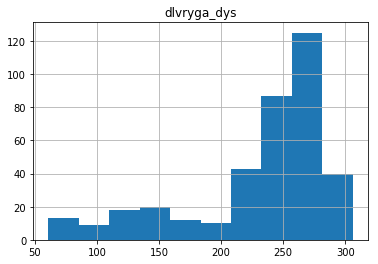

In [570]:
y.loc[drop_records].replace(-999999,np.nan).dropna().hist()

# Ces/Ind/Unk removed & GA@birth < 25wks removed


## S1 w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [732]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]

# Target
target = 'dlvryga_dys'

# Define Scenario Data (only Demo/Clinical)
x = dff.drop(targets + sensor_cols, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3849, 115)
x_val: (825, 115)
dlvryga_dys 

Trn MSE: 27.34915188360613
Val MSE: 157.6777684848485
-------------------
Trn MnAbsErr: 3.569888282670824
Val MnAbsErr: 9.311248484848486
-------------------
Trn r2: 0.8732347545529976
Val r2: 0.11646525632687321


,x_col,gini_importance
1,bmiri,0.079081
2,t_anxiety,0.073903
3,height,0.058915
4,armcirmm,0.058038
5,precarefirstga,0.055676
6,growth_deviation_index,0.043408
7,mat_age,0.043092
8,s_anxiety,0.042396
9,edinburgh,0.031653
10,avgnumcighome,0.031092


In [ ]:
"""
Trn MSE: 27.650444868797095
Val MSE: 172.41470000000004
-------------------
Trn MnAbsErr: 3.578672382436997
Val MnAbsErr: 9.434807417974323
-------------------
Trn r2: 0.8718382403436452
Val r2: 0.11198155982394886
"""

In [726]:
x_val.shape

(825, 115)

## S2 w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [731]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)



# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors)
x = dff.drop(targets, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3849, 355)
x_val: (825, 355)
dlvryga_dys 

Trn MSE: 21.04821852429202
Val MSE: 129.4110267878788
-------------------
Trn MnAbsErr: 3.3091114575214347
Val MnAbsErr: 8.49009696969697
-------------------
Trn r2: 0.9024400245093741
Val r2: 0.2748556788936821


,x_col,gini_importance
1,sensor_toi_f3_mvt_pwr_mvt21,0.072639
2,sensor_toi_f3_mvt_pwr_mvt31,0.049518
3,sensor_toi_f3_mvt_pwr_mvt41,0.038660
4,bmiri,0.038077
5,armcirmm,0.034506
6,sensor_monrmssd_f32f_rmssd,0.033284
7,sensor_monrmssd_f12f_rmssd,0.028193
8,growth_deviation_index,0.023776
9,precarefirstga,0.023339
10,height,0.022769


In [ ]:
"""
Trn MSE: 21.084393998441154
Val MSE: 138.6322883024251
-------------------
Trn MnAbsErr: 3.2951493894518054
Val MnAbsErr: 8.60432239657632
-------------------
Trn r2: 0.9022723486385027
Val r2: 0.28597719094511
"""

## S3 w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [733]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)




/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [735]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3677, 355)
x_val: (788, 355)
dlvryga_dys 

Trn MSE: 18.60955248844166
Val MSE: 126.05878210659897
-------------------
Trn MnAbsErr: 3.154873538210498
Val MnAbsErr: 8.110291878172589
-------------------
Trn r2: 0.9015513308930028
Val r2: 0.1796029844275644


,x_col,gini_importance
1,sensor_toi_f3_mvt_pwr_mvt21,0.053562
2,sensor_toi_f3_mvt_pwr_mvt31,0.044930
3,sensor_monrmssd_f32f_stdev,0.043821
4,sensor_toi_f3_mvt_pwr_mvt41,0.040236
5,sensor_monrmssd_f32f_iqr,0.034636
6,sensor_monrmssd_f32f_sc_a,0.030731
7,sensor_monrmssd_f32f_rmssd,0.030635
8,bmiri,0.029873
9,growth_deviation_index,0.023190
10,precarefirstga,0.022255


In [ ]:
"""
Trn MSE: 18.280505548001084
Val MSE: 127.08636037313433
-------------------
Trn MnAbsErr: 3.1602148490617354
Val MnAbsErr: 8.23284328358209
-------------------
Trn r2: 0.903292062346928
Val r2: 0.1935016521045979
"""

# S3 w/ Ces/Ind/Unk removed, GA@birth < 25wks removed, and patients must have at 1 of the f3 vars that have at least 2/3 data.

In [736]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


In [737]:
x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32')

,perc
sensor_toi_f32f_hrmean1,15.66
sensor_toi_f32f_hrmed1,15.66
sensor_toi_f32f_hrstd1,15.66
sensor_toi_f3_medcc4,22.17
sensor_toi_f3_medlag4,22.17
sensor_toi_f3_mvt_pwr_mvt21,12.31
sensor_toi_f3_mvt_pwr_mvt31,12.31
sensor_toi_f3_mvt_pwr_mvt41,12.31
sensor_monrmssd_f32f_numberofgoodrwaves,31.16
sensor_monrmssd_f32f_numberofgoodrwaves_scandrm,31.16


In [738]:
f3_cols_le32null = x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()


In [739]:
# Define Scenario Data (DC + Sensors, restricted records)
sensor_cols = f3_cols_le32null
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)



/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [740]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:', x_trn.shape)
print('x_val:', x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3502, 355)
x_val: (751, 355)
dlvryga_dys 

Trn MSE: 13.240381924614503
Val MSE: 100.91586418109186
-------------------
Trn MnAbsErr: 2.8241433466590506
Val MnAbsErr: 7.8882822902796255
-------------------
Trn r2: 0.8680794148214638
Val r2: 0.06489928060036099


,x_col,gini_importance
1,bmiri,0.039813
2,armcirmm,0.035282
3,precarefirstga,0.028376
4,growth_deviation_index,0.024077
5,sensor_toi_f3_mvt_pwr_mvt21,0.023470
6,height,0.022450
7,sensor_toi_f3_mvt_pwr_mvt31,0.022003
8,sensor_toi_f3_mvt_pwr_mvt41,0.021383
9,s_anxiety,0.020898
10,t_anxiety,0.018129


In [ ]:
"""
Trn MSE: 12.92287784123358
Val MSE: 97.08548111285265
-------------------
Trn MnAbsErr: 2.800285551113649
Val MnAbsErr: 7.690822884012538
-------------------
Trn r2: 0.8712428677123747
Val r2: 0.06447477794094791
"""

# S3 w/ Ces/Ind/Unk removed, GA@birth <= 33wks removed, and patients must have at 1 of the f3 vars that have at least 2/3 data.


Wow... That last one was horrible.  Suggests to me that missingness might still be the reason
sensors help at all...

In [600]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 33 wks (<= 225 days)
dff.query('dlvryga_dys >= 225')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
f3_cols_le32null = x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()
sensor_cols = f3_cols_le32null
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)



/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [601]:
x.shape

(5004, 355)

In [602]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 13.2486025128498
Val MSE: 95.41850384012538
-------------------
Trn MnAbsErr: 2.8386293546544836
Val MnAbsErr: 7.637405956112852
-------------------
Trn r2: 0.8684919449697507
Val r2: 0.07816363444988139


,x_col,gini_importance
1,bmiri,0.043304
2,armcirmm,0.035717
3,precarefirstga,0.028293
4,sensor_toi_f3_mvt_pwr_mvt21,0.021790
5,growth_deviation_index,0.021690
6,height,0.021283
7,sensor_toi_f3_mvt_pwr_mvt31,0.020563
8,sensor_toi_f32f_hrstd1,0.019581
9,s_anxiety,0.018868
10,sensor_toi_f3_mvt_pwr_mvt41,0.018652


In [615]:
pd.DataFrame([TREE.tree_.max_depth for TREE in rf.estimators_]).describe()[3:]

,0
min,25.0
25%,31.0
50%,33.0
75%,36.0
max,45.0


In [616]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=36)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 13.250451145426645
Val MSE: 90.71435871833643
-------------------
Trn MnAbsErr: 2.8481438804307655
Val MnAbsErr: 7.506181874266193
-------------------
Trn r2: 0.8714656273761269
Val r2: 0.075958751150079


,x_col,gini_importance
1,armcirmm,0.044971
2,bmiri,0.033754
3,precarefirstga,0.029581
4,growth_deviation_index,0.022999
5,sensor_toi_f3_mvt_pwr_mvt21,0.021420
6,height,0.020702
7,sensor_toi_f3_mvt_pwr_mvt31,0.019488
8,parity,0.019310
9,sensor_toi_f3_mvt_pwr_mvt41,0.019304
10,t_anxiety,0.018289


In [617]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=33)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 13.389898902845475
Val MSE: 96.36788751448321
-------------------
Trn MnAbsErr: 2.8496645512685803
Val MnAbsErr: 7.714867189319554
-------------------
Trn r2: 0.8671626350612203
Val r2: 0.08222940591411687


,x_col,gini_importance
1,armcirmm,0.042254
2,bmiri,0.036180
3,precarefirstga,0.031630
4,growth_deviation_index,0.023897
5,height,0.022615
6,sensor_toi_f3_mvt_pwr_mvt31,0.021990
7,sensor_toi_f3_mvt_pwr_mvt21,0.021516
8,sensor_toi_f32f_hrstd1,0.019122
9,t_anxiety,0.018799
10,sensor_toi_f3_medcc4,0.018228


In [618]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=30)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 12.94057823785214
Val MSE: 96.04299688108897
-------------------
Trn MnAbsErr: 2.8098815607059704
Val MnAbsErr: 7.765815913624986
-------------------
Trn r2: 0.8717868633774497
Val r2: 0.06144721664465269


,x_col,gini_importance
1,armcirmm,0.038559
2,bmiri,0.036597
3,precarefirstga,0.028689
4,growth_deviation_index,0.023937
5,height,0.022915
6,sensor_toi_f3_mvt_pwr_mvt31,0.019884
7,sensor_toi_f3_mvt_pwr_mvt21,0.019700
8,sensor_toi_f3_mvt_pwr_mvt41,0.019382
9,t_anxiety,0.018386
10,edinburgh,0.018080


In [619]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=25)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 13.614695307502195
Val MSE: 93.265423869935
-------------------
Trn MnAbsErr: 2.9081884920437435
Val MnAbsErr: 7.501017304554251
-------------------
Trn r2: 0.866703635273858
Val r2: 0.07986580082586192


,x_col,gini_importance
1,bmiri,0.046673
2,armcirmm,0.032724
3,precarefirstga,0.030700
4,growth_deviation_index,0.025601
5,height,0.024301
6,sensor_toi_f3_mvt_pwr_mvt21,0.020923
7,sensor_toi_f3_mvt_pwr_mvt31,0.020128
8,t_anxiety,0.019126
9,sensor_toi_f32f_hrstd1,0.018080
10,s_anxiety,0.018035


In [620]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=15)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 25.695133725182725
Val MSE: 93.92741641060006
-------------------
Trn MnAbsErr: 4.083427103736701
Val MnAbsErr: 7.586191119063917
-------------------
Trn r2: 0.7414460820391722
Val r2: 0.0878939062425933


,x_col,gini_importance
1,bmiri,0.044411
2,armcirmm,0.033403
3,precarefirstga,0.026055
4,growth_deviation_index,0.024985
5,sensor_toi_f3_mvt_pwr_mvt21,0.024044
6,height,0.020194
7,sensor_toi_f3_mvt_pwr_mvt31,0.019264
8,t_anxiety,0.017998
9,sensor_toi_f32f_hrstd1,0.016592
10,sensor_toi_f3_mvt_pwr_mvt41,0.016440


In [622]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, max_depth=7)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


dlvryga_dys 

Trn MSE: 69.30317813810827
Val MSE: 92.28143001832687
-------------------
Trn MnAbsErr: 6.650652099609667
Val MnAbsErr: 7.4934672444759
-------------------
Trn r2: 0.3158477207129631
Val r2: 0.08844706602263508


,x_col,gini_importance
1,armcirmm,0.054765
2,bmiri,0.053793
3,growth_deviation_index,0.047551
4,parity,0.040535
5,precarefirstga,0.028708
6,totalstddrinkst2,0.023485
7,hxpt2,0.017596
8,sensor_toi_f3_mvt_pwr_mvt31,0.015689
9,edinburgh,0.014228
10,sensor_monrmssd_f31f_perc,0.014007


# One more shot at F1 data

In [675]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 33 wks (<= 225 days)
dff.query('dlvryga_dys >= 225')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
f1_cols_le52null = dff[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 53').filter(axis=0,regex='.+f1.+').index.tolist()

drop_cols = [item for item in sensor_cols if item not in f1_cols_le52null]
keep_cols = f1_cols_le52null #########

x = dff.drop(targets, axis=1)
y = dff[[target]]

drop_records = dff.index[ 
    dff[keep_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(keep_cols)
]

x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)



ZeroDivisionError: division by zero

In [676]:
# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.15)

# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:20]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 355)) while a minimum of 1 is required.

In [745]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 33 wks (<= 225 days)
dff.query('dlvryga_dys >= 225')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
f3_cols_le32null = x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()
sensor_cols = f3_cols_le32null
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
#x.drop(drop_records, inplace=True)
#y.drop(drop_records, inplace=True)

In [742]:
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


In [743]:
[item for item in dff.columns if 'sensor' in item].__len__()

240

In [744]:
dff.shape

(6903, 362)

In [749]:
dff.replace(-999999,np.nan).isnull().sum().map(lambda x: round(100 * x/ len(dff), 1)).sum()/len(dff.columns)

57.71160220994475

In [752]:
dff.replace(-999999,np.nan).isnull().sum(axis=1).map(lambda x: round(100 * x/ len(dff.columns), 1)).sum()/len(dff)

57.71105082293363

In [755]:
(dff.replace(-999999,np.nan).isnull().sum() == 0).sum()

9